In [4]:
import pandas as pd

# save filepath to variable for easier access
melbourne_file_path = 'melb_data.csv'

# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 

# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

## Selecting Data for Modeling

In [22]:
# Selecting The Prediction Target

y = melbourne_data.Price ## create Series

In [8]:
# Choosing "Features"

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.describe()
# X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


## Building Your Model

- Define: 
    - What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- Fit: 
    - Capture patterns from provided data. This is the heart of modeling.
- Predict: 
    - Just what it sounds like
- Evaluate: 
    - Determine how accurate the model's predictions are.

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run

# It doesn't matter if the random_state is 0 or 1 or any other integer. 
# What matters is that it should be set the same value, if you want to validate your processing over multiple runs of the code. 
# By the way I have seen random_state=42 used in many official examples of scikit as well as elsewhere also.
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [10]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


## Model Validation

Mean Absolute Error (also called MAE)

```
error=actual−predicted
```

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors.

In [13]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X) ## create Series
mean_absolute_error(y, predicted_home_prices) ## compare two Series

## !!! "In-Sample" Scores

1115.7467183128902

### Train-test split

In [18]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

272472.3133204218


## Underfitting and Overfitting

- **Overfitting:** capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- **Underfitting:** failing to capture relevant patterns, again leading to less accurate predictions.

We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

In [19]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [20]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996


## Random Forests

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))


207190.6873773146


Some visualization...

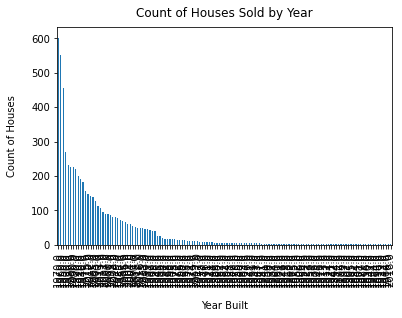

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

melbourne_data['YearBuilt'].value_counts().plot(kind='bar');
plt.xlabel("Year Built", labelpad=14)
plt.ylabel("Count of Houses", labelpad=14)
plt.title("Count of Houses Build by Year", y=1.02);